# Alphabeta Search vs Monte Carlo Tree Search 
## Bachelors thesis

MCTS & Heuristiken Allgemein:
- Kato H., Fazekas S.Z., Takaya M., Yamamura A. (2015) Comparative Study of Monte-Carlo Tree Search and Alpha-Beta Pruning in Amazons. In: Khalil I., Neuhold E., Tjoa A., Xu L., You I. (eds) Information and Communication Technology. ICT-EurAsia 2015. Lecture Notes in Computer Science, vol 9357. Springer, Cham. https://doi.org/10.1007/978-3-319-24315-3_14

MCTS verbesserte UCB1 Formel:
- Kocsis, L., Szepesv ́ari, C.: Bandit based Monte Carlo planning. In: 17th EuropeanConference on Machine Learning (ECML 2006), pp. 282–293 (2006)

Territorial Evaluation Heuristik:
- Lieberum, J.: An evaluation function for the game of Amazons. Theoret. Comput.Sci.349, 230–244 (2005

Alpha Beta - Optimierung:
- Efficient implementation of Game Trees, Nicholas Gorski

In [1]:
'''
@Author: Guen Yanik 2021 
@Section: Imports
'''
import matplotlib
from matplotlib import pyplot as plt
from statistics import mean
import numpy as np
import pandas as pd

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 160
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=[
    "332288", "88CCEE", "117733", "999933", "DDCC77", "CC6677", "882255", "AA4499"
], marker=['D', 's', 'X', 'o', '.', 'X','o','o']) 
 

## Runtime analysis 1.1

In [8]:
'''
    @Section: M_t vs M_m runtime comparision @cunittest.time_benchmarks
    >>> cunittest.time_benchmark_mobility()
        4x4 4 is white wc:  1.71661376953125e-05  seconds
        6x6 4 is white wc:  2.3126602172851562e-05  seconds
        8x8 4 is white wc:  3.695487976074219e-05  seconds
        10x10 4 is white wc:  4.506111145019531e-05  seconds
    >>> cunittest.time_benchmark_territory()
        4x4 4 is white wc:  8.249282836914062e-05  seconds
        6x6 4 is white wc:  0.00012087821960449219  seconds
        8x8 4 is white wc:  0.0001938343048095703  seconds
        10x10 4 is white wc:  0.0002760887145996094  seconds

'''
# NORMAL
time_benchmarks_plain = {
        'Heuristik':  ['mobility evaluation', 'territorial evaluation'],
    
        4 : [1.72e-05, 8.25e-05],
        6 : [2.31e-05, 12.1e-05],
        8: [3.67e-05, 19.4e-05],
        10: [4.51e-05 ,27.6e-05]
     }

df = pd.DataFrame (time_benchmarks_plain , columns = ['Heuristik',4,6,8,10])
df

,Heuristik,4,6,8,10
0,mobility evaluation,0.000017,0.000023,0.000037,0.000045
1,territorial evaluation,0.000082,0.000121,0.000194,0.000276


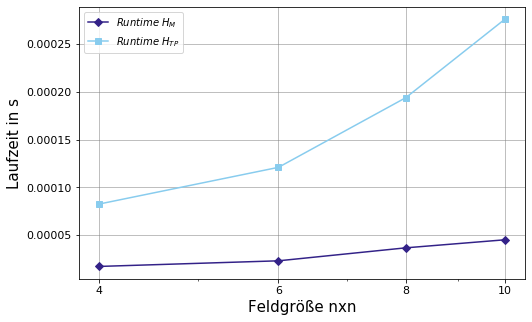

In [9]:


tim = df.iloc[::,1:]
tim = tim.rename(index={0: '$Runtime\ H_M$',1:'$Runtime\ H_{TP}$'})
tim = tim.T

ax = tim.plot(logx=True, linestyle='-',figsize=(8, 5)); # Durchschnitt
ax.set_xlabel('Feldgröße nxn',fontsize=15)
ax.set_ylabel('Laufzeit in s',fontsize=15)
ax.set_xticks([4,6,8,10])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(11)
ax.grid(color='gray', linestyle='-', linewidth=.5)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.figure.savefig('plots/laufzeit_1.pdf')  

## Space analysis 

In [5]:
# NORMAL
rate_benchmarks_mcts = {
        'MCTS':  ['$UCT_{vanilla}$', '$UCT\ optimized$'],
        5 : [.26, .53],
        10: [.29, 1.14],
        15: [.34, 1.6],
        20: [.37 ,1.9],
        25: [.41, 2.2],
        30: [.45 ,2.8]
     }

df = pd.DataFrame (rate_benchmarks_mcts , columns = ['UCT',5,10,15,20,25,30])
df

,UCT,5,10,15,20,25,30
0,NaN,0.26,0.29,0.34,0.37,0.41,0.45
1,NaN,0.53,1.14,1.60,1.90,2.20,2.80


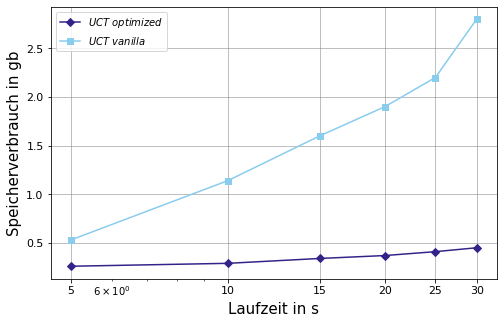

In [6]:
tim = df.iloc[::,1:]
tim = tim.rename(index={0: '$UCT\ optimized$',1:'$UCT\ vanilla$'})
tim = tim.T

ax = tim.plot(logx=True, linestyle='-',figsize=(8, 5)); # Durchschnitt
ax.set_xlabel('Laufzeit in s',fontsize=15)
ax.set_ylabel('Speicherverbrauch in gb',fontsize=15)
ax.set_xticks([5,10,15,20,25,30])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(11)
ax.grid(color='gray', linestyle='-', linewidth=.5)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.figure.savefig('plots/space_1.pdf')  

## Runtime-optimaltiy trade off 1.2

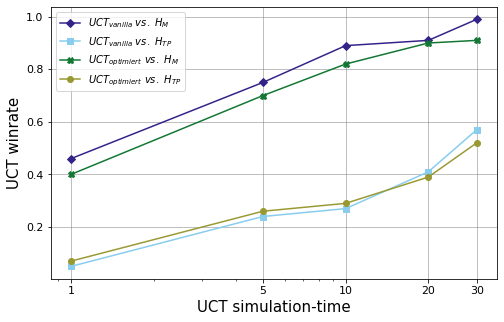

In [8]:
'''
    @Section: M_t vs M_m runtime comparision @run_time.py --> newres.txt
    MCTS = 1000 : line 0-114 @cython/newres.txt

'''
# NORMAL
win_acc = {
        
    
    'Heuristik':  ['ME', "TPE",'ME', "TPE"],
       1: [.46,.05,.40,.07],
       5: [.75,.24,.70,.26],
       10: [.89,.27,.82, .29],
       20: [.91,.41,.90, .39],
       30: [.99,.57, .91, .52]
     }

df = pd.DataFrame (win_acc , columns = ['Heuristik',1,5,10,20,30])
tim = df.iloc[::,1:]
tim = tim.rename(index={0: '$UCT_{vanilla}\ vs.\ H_{M}$',
                        1:'$UCT_{vanilla}\ vs.\ H_{TP}$',
                        2:'$UCT_{optimiert}\ vs.\ H_{M}$',
                        3:'$UCT_{optimiert}\ vs.\ H_{TP}$'})
tim = tim.T

ax = tim.plot(logx=True, linestyle='-',figsize=(8, 5)); # Durchschnitt
ax.set_xlabel('UCT simulation-time',fontsize=15)
ax.set_ylabel('UCT winrate',fontsize=15)
ax.set_xticks([1,5,10,20,30])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(11)
ax.grid(color='gray', linestyle='-', linewidth=.5)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.figure.savefig('plots/uct_uni.pdf')  